# Librerías

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/

# Numpy & pandas
import numpy as np
import pandas as pd
import missingno as mn
from random import sample
from numpy.random import uniform
from math import isnan

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

# Seaborn
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import rcParams


# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from IPython.display import display, HTML
init_notebook_mode(connected=True)

# SciPy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# SKLearn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.optimize import linprog
from scipy.spatial import Delaunay

# Bank Notes

## Importing Data

In [ ]:
#Save the dataset in such a way that we can call any feature
bank_note = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", 
                 sep = ',', 
                 header = None, 
                 names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'],
                 thousands = ',')

print('Dimensionality of the Dataframe:', bank_note.shape)

Dimensionality of the Dataframe: (1372, 5)


## Preprocessing

In [ ]:
np.random.seed(42)

In [ ]:
# Changing column names

bank_note.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
bank_note.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [ ]:
bank_note_target = bank_note['class']
bank_note_X = bank_note.drop(['class'], axis = 1)

## Feature Scaling

In [ ]:
X_train_banknote, X_rem, y_train_banknote, y_rem = train_test_split(bank_note_X,bank_note_target, train_size=0.8)

X_valid_banknote, X_test_banknote, y_valid_banknote, y_test_banknote = train_test_split(X_rem, y_rem, test_size=0.5)

In [ ]:
scaler_banknote = StandardScaler()
banknote_transformed = scaler_banknote.fit_transform(X_train_banknote)
banknote_transformed_test = scaler_banknote.transform(X_test_banknote)
banknote_transformed_valid = scaler_banknote.transform(X_valid_banknote)

## Hyperparameter Adjustment

### Logistic Regression

In [ ]:
model_banknote_logistic = LogisticRegression(max_iter=10000)

hyperparameters_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000], 
              'penalty': ['l2','l1'],
              'solver': ['liblinear', 'saga']}

f1 = make_scorer(f1_score)

grid_search_logistic = GridSearchCV(model_banknote_logistic, hyperparameters_grid_logistic, scoring=f1, cv=5)
grid_search_logistic.fit(banknote_transformed, y_train_banknote)

print("Best Hyperparameters: ", grid_search_logistic.best_params_)
print("Best Accuracy: ", grid_search_logistic.best_score_)

Best Hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.9916771803099673


### SVM

In [ ]:
model_svm_banknote = SVC(max_iter=10000)

hyperparameters_grid_svm = {'C': [0.01, 0.1, 1, 10, 100], 
              'kernel': ['rbf',],#'sigmoid','poly','linear'
              'gamma': [0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(model_svm_banknote, hyperparameters_grid_svm, cv=5, scoring=f1)

grid_search_svm.fit(banknote_transformed, y_train_banknote)

print("Best Hyperparameters: ", grid_search_svm.best_params_)
print("Best Accuracy: ", grid_search_svm.best_score_)

Best Hyperparameters:  {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best Accuracy:  1.0


### KNN

In [ ]:
knn_banknote = KNeighborsClassifier()

hyperparameters_grid_knn = {'n_neighbors': [3, 5, 7, 9], 
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']
              }

knn_grid_search_banknote = GridSearchCV(knn_banknote, hyperparameters_grid_knn, cv=5, scoring=f1)

knn_grid_search_banknote.fit(banknote_transformed, y_train_banknote)

print("Best Hyperparameters: ", knn_grid_search_banknote.best_params_)
print("Best Accuracy: ", knn_grid_search_banknote.best_score_)

Best Hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy:  0.9979380895443072


### Decision Tree

In [ ]:
dt_banknote = DecisionTreeClassifier()

hyperparameters_grid_dt = {'max_depth': [5, 10, 15, 20], 
              'min_samples_split': [2, 5, 10, 15, 20]}

dt_grid_search_banknote = GridSearchCV(dt_banknote, hyperparameters_grid_dt, cv=5, scoring=f1)

dt_grid_search_banknote.fit(banknote_transformed, y_train_banknote)

print("Best Hyperparameters: ", dt_grid_search_banknote.best_params_)
print("Best Accuracy: ", dt_grid_search_banknote.best_score_)

Best Hyperparameters:  {'max_depth': 10, 'min_samples_split': 2}
Best Accuracy:  0.9834166838265167


## Model Evaluation

### Logistic Regression

In [ ]:
model_logistic_reg_banknote = LogisticRegression(C=100,penalty = 'l1', solver= 'liblinear',max_iter=10000, random_state= 42)

model_logistic_reg_banknote.fit(banknote_transformed, y_train_banknote)

predictions_banknote_logistic = model_logistic_reg_banknote.predict(banknote_transformed_test)

print("Logistic Regression Banknote Data Set: ")
print("F1 Score: ", f1_score(y_test_banknote, predictions_banknote_logistic))
print("Accuracy Score: ", accuracy_score(y_test_banknote, predictions_banknote_logistic))
print("Precision Score: ", precision_score(y_test_banknote, predictions_banknote_logistic))
print("Recall Score: ", recall_score(y_test_banknote, predictions_banknote_logistic))

Logistic Regression Banknote Data Set: 
F1 Score:  0.9787234042553192
Accuracy Score:  0.9782608695652174
Precision Score:  0.971830985915493
Recall Score:  0.9857142857142858


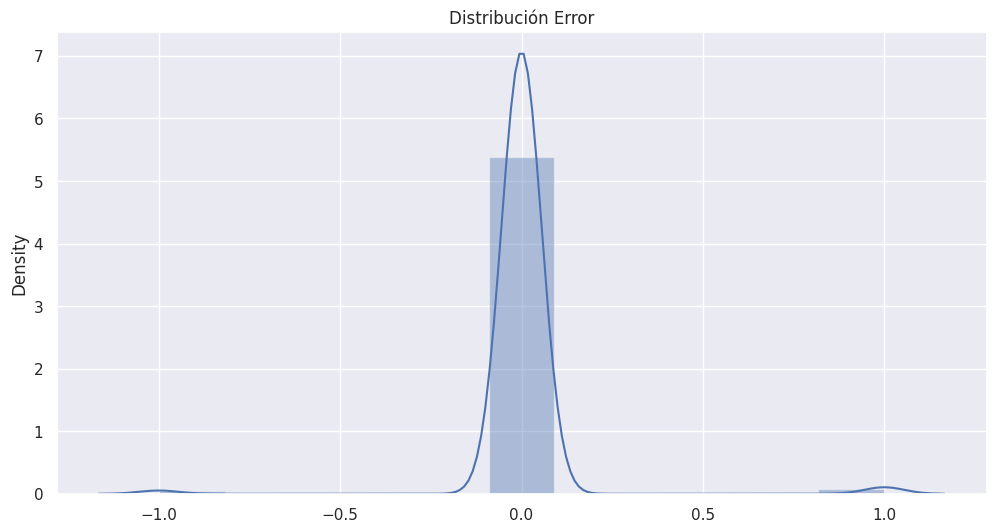

In [ ]:
#Ploteamos la distribución del error de tu modelo
error = predictions_banknote_logistic - y_test_banknote.values

sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribución Error')
plt.show()

### SVM

In [ ]:
model_svm_banknote = SVC(C= 1, gamma= 10, kernel= 'rbf', max_iter=10000)

model_svm_banknote.fit(banknote_transformed, y_train_banknote)

svm_predictions_banknote = model_svm_banknote.predict(banknote_transformed_test)

print("SVM Banknote Data Set: ")
print("F1 Score: ", f1_score(y_test_banknote, svm_predictions_banknote))
print("Accuracy: ", accuracy_score(y_test_banknote, svm_predictions_banknote))
print("Precision: ", precision_score(y_test_banknote, svm_predictions_banknote))
print("recall: ", recall_score(y_test_banknote, svm_predictions_banknote))

SVM Banknote Data Set: 
F1 Score:  1.0
Accuracy:  1.0
Precision:  1.0
recall:  1.0


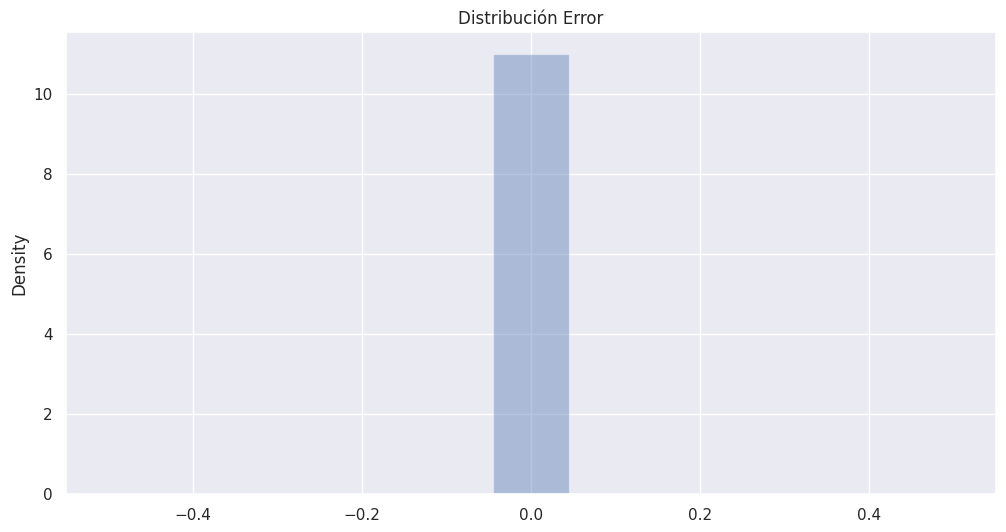

In [ ]:
#Ploteamos la distribución del error de tu modelo
error = svm_predictions_banknote - y_test_banknote.values

sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribución Error')
plt.show()

### KNN

In [ ]:
knn_banknote = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights= 'uniform')

knn_banknote.fit(banknote_transformed, y_train_banknote)

knn_predictions_banknote = knn_banknote.predict(banknote_transformed_test)

print("KNN Banknote Data Set: ")
print("F1 Score: ", f1_score(y_test_banknote, knn_predictions_banknote))
print("Accuracy: ", accuracy_score(y_test_banknote, knn_predictions_banknote))
print("Precision: ", precision_score(y_test_banknote, knn_predictions_banknote))
print("recall: ", recall_score(y_test_banknote, knn_predictions_banknote))

KNN Banknote Data Set: 
F1 Score:  1.0
Accuracy:  1.0
Precision:  1.0
recall:  1.0


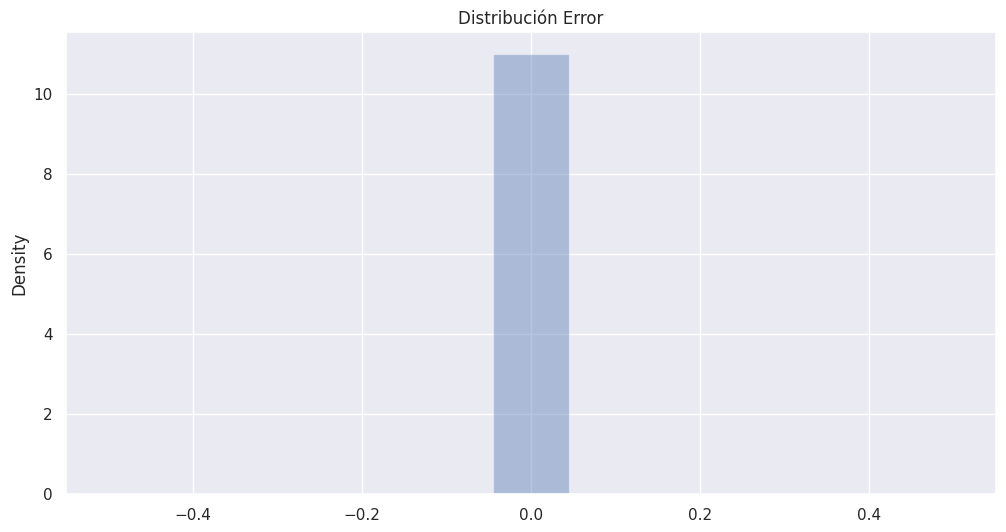

In [ ]:
#Ploteamos la distribución del error de tu modelo
error = knn_predictions_banknote - y_test_banknote.values

sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribución Error')
plt.show()

### Decision Tree

In [ ]:
dt_banknote = DecisionTreeClassifier(max_depth= 20, min_samples_split= 2)

dt_banknote.fit(banknote_transformed, y_train_banknote)

dt_predictions_banknote = dt_banknote.predict(banknote_transformed_test)

print("Decision Tree Banknote Data Set: ")
print("F1 Score: ", f1_score(y_test_banknote, dt_predictions_banknote))
print("Accuracy: ", accuracy_score(y_test_banknote, dt_predictions_banknote))
print("Precision: ", precision_score(y_test_banknote, dt_predictions_banknote))
print("recall: ", recall_score(y_test_banknote, dt_predictions_banknote))

Decision Tree Banknote Data Set: 
F1 Score:  0.9855072463768115
Accuracy:  0.9855072463768116
Precision:  1.0
recall:  0.9714285714285714


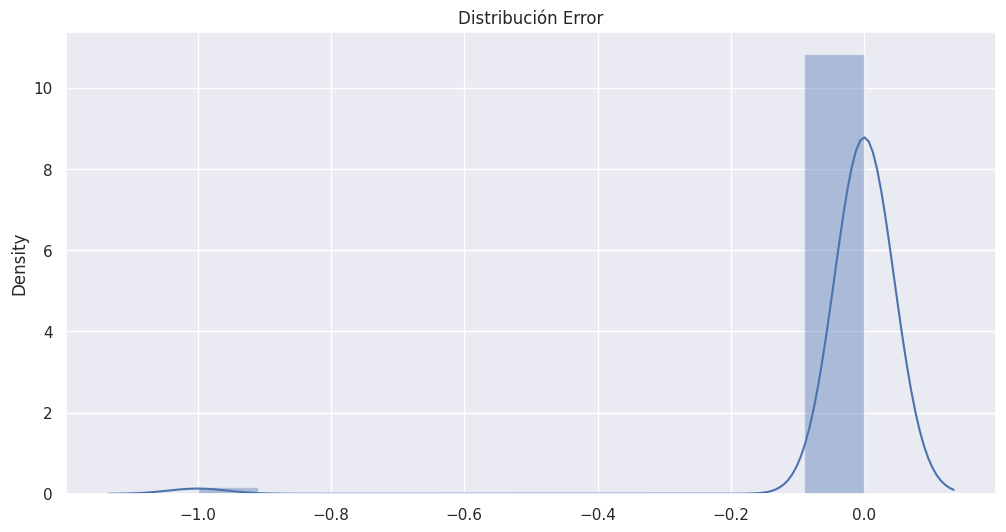

In [ ]:
#Ploteamos la distribución del error de tu modelo
error = dt_predictions_banknote - y_test_banknote.values

sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribución Error')
plt.show()

## Evaluation of the Best Model 

In [ ]:
svm_predictions_valid_banknote = model_svm_banknote.predict(banknote_transformed_valid)
knn_predictions_valid_banknote = knn_banknote.predict(banknote_transformed_valid)

print("SVM Banknote Data Set: ")
print("F1 Score: ", f1_score(y_valid_banknote, svm_predictions_valid_banknote))
print("Accuracy: ", accuracy_score(y_valid_banknote, svm_predictions_valid_banknote))
print("Precision: ", precision_score(y_valid_banknote, svm_predictions_valid_banknote))
print("recall: ", recall_score(y_valid_banknote, svm_predictions_valid_banknote))

print("\nKNN Banknote Data Set: ")
print("F1 Score: ", f1_score(y_valid_banknote, knn_predictions_valid_banknote))
print("Accuracy: ", accuracy_score(y_valid_banknote, knn_predictions_valid_banknote))
print("Precision: ", precision_score(y_valid_banknote, knn_predictions_valid_banknote))
print("recall: ", recall_score(y_valid_banknote, knn_predictions_valid_banknote))

SVM Banknote Data Set: 
F1 Score:  1.0
Accuracy:  1.0
Precision:  1.0
recall:  1.0

KNN Banknote Data Set: 
F1 Score:  1.0
Accuracy:  1.0
Precision:  1.0
recall:  1.0


# Occupancy

## Importing  Data

In [ ]:
from pathlib import Path
import urllib.request
import zipfile
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

def load_occupancy_data():
    tarball_path = Path("datasets/occupancy_data.zip")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip"
        urllib.request.urlretrieve(url, tarball_path)
        with zipfile.ZipFile(tarball_path) as occupancy_tarball:
           # open the csv file in the dataset
           occupancy_tarball.extractall(path="datasets")
    list_df =[pd.read_csv(Path("datasets/datatraining.txt"),parse_dates=['date'],date_parser=dateparse),
              pd.read_csv(Path("datasets/datatest.txt"),parse_dates=['date'],date_parser=dateparse),
              pd.read_csv(Path("datasets/datatest2.txt"),parse_dates=['date'],date_parser=dateparse),]
    return list_df

occupancy_train, occupancy_test1, occupancy_test2 = load_occupancy_data()

## Preprocessing

In [ ]:
occupancy_train['date_numeric'] = occupancy_train['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)
occupancy_test1['date_numeric'] = occupancy_test1['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)
occupancy_test2['date_numeric'] = occupancy_test2['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)

In [ ]:
X_train_o = occupancy_train[['date_numeric', 'Temperature', 'Humidity', 'Light', 
              'CO2', 'HumidityRatio', 'Occupancy']]
y_train_o = occupancy_train['Occupancy']

X_test1_o = occupancy_test1[['date_numeric', 'Temperature', 'Humidity', 'Light', 
              'CO2', 'HumidityRatio', 'Occupancy']]
y_test1_o = occupancy_test2['Occupancy']

In [ ]:
variables_occupancy = ['date_numeric', 'Temperature', 'Humidity', 'Light', 
              'CO2', 'HumidityRatio']

In [ ]:
#Occupancy Detection Data Set:
scaler_occupancy = StandardScaler()
df_occupancy_transformed = scaler_occupancy.fit_transform(occupancy_train[variables_occupancy])
df_occupancy_transformed_test1 = scaler_occupancy.transform(occupancy_test1[variables_occupancy])
df_occupancy_transformed_test2 = scaler_occupancy.transform(occupancy_test2[variables_occupancy])

## Hyperparameter Adjustment

### Logistic Regression

In [ ]:
model_logistic_reg_occupancy = LogisticRegression(max_iter=10000)
log_grid_search_occupancy = GridSearchCV(model_logistic_reg_occupancy, hyperparameters_grid_logistic, cv=5, scoring=f1)
log_grid_search_occupancy.fit(df_occupancy_transformed, occupancy_train["Occupancy"])

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(f1_score))

In [ ]:
print("\n\t Occupancy Data Set: ")
print("Best Hyperparameters: ", log_grid_search_occupancy.best_params_)
print("Best F1 Score: ", log_grid_search_occupancy.best_score_)


	 Occupancy Data Set: 
Best Hyperparameters:  {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best F1 Score:  0.9677440928347621


### SVM

In [ ]:
model_svm_occupancy = SVC(max_iter=10000)

svm_grid_search_occupancy = GridSearchCV(model_svm_occupancy, hyperparameters_grid_svm, cv=5, scoring=f1)

svm_grid_search_occupancy.fit(df_occupancy_transformed, occupancy_train["Occupancy"])

print("\n\t Occupancy Data Set: ")
print("Best hyperparameters: ", svm_grid_search_occupancy.best_params_)
print("Best F1 Score: ", svm_grid_search_occupancy.best_score_)


	 Occupancy Data Set: 
Best hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best F1 Score:  0.9554811142205516


### KNN

In [ ]:
knn_occupancy = KNeighborsClassifier()

knn_grid_search_occupancy = GridSearchCV(knn_occupancy, hyperparameters_grid_knn, cv=5, scoring=f1)

knn_grid_search_occupancy.fit(df_occupancy_transformed, occupancy_train["Occupancy"])

print("\n\t Occupancy Data Set: ")
print("Best hyperparameters: ", knn_grid_search_occupancy.best_params_)
print("Best F1 Score: ", knn_grid_search_occupancy.best_score_)


	 Occupancy Data Set: 
Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best F1 Score:  0.844088395771888


### Decission Tree

In [ ]:
dtc_occupancy = DecisionTreeClassifier()

dtc_grid_search_occupancy = GridSearchCV(dtc_occupancy, hyperparameters_grid_dt, cv=5, scoring=f1)

dtc_grid_search_occupancy.fit(df_occupancy_transformed, occupancy_train["Occupancy"])

print("\n\tBest Hyperparameters Occupancy Data Set: ")
print("Best hyperparameters: ", dtc_grid_search_occupancy.best_params_)
print("Best F1 Score: ", dtc_grid_search_occupancy.best_score_)


	Best Hyperparameters Occupancy Data Set: 
Best hyperparameters:  {'max_depth': 5, 'min_samples_split': 10}
Best F1 Score:  0.7142175609349459


## Model Evaluation

### Logistic Regression

In [ ]:
model_logistic_reg_occupancy = LogisticRegression(max_iter=10000,C= 0.001, penalty= 'l1', solver= 'saga')

model_logistic_reg_occupancy.fit(df_occupancy_transformed, occupancy_train["Occupancy"])

log_predictions_occupancy = model_logistic_reg_occupancy.predict(df_occupancy_transformed_test1)

print("\nLogistic Regression Occupancy Data Set: ")
print("F1 Score: ", f1_score(occupancy_test1["Occupancy"], log_predictions_occupancy))
print("Accuracy Score: ", accuracy_score(occupancy_test1["Occupancy"], log_predictions_occupancy))
print("Precision Score: ", precision_score(occupancy_test1["Occupancy"], log_predictions_occupancy))
print("Recall Score: ", recall_score(occupancy_test1["Occupancy"], log_predictions_occupancy))


Logistic Regression Occupancy Data Set: 
F1 Score:  0.9714285714285715
Accuracy Score:  0.9786116322701689
Precision Score:  0.9472140762463344
Recall Score:  0.9969135802469136


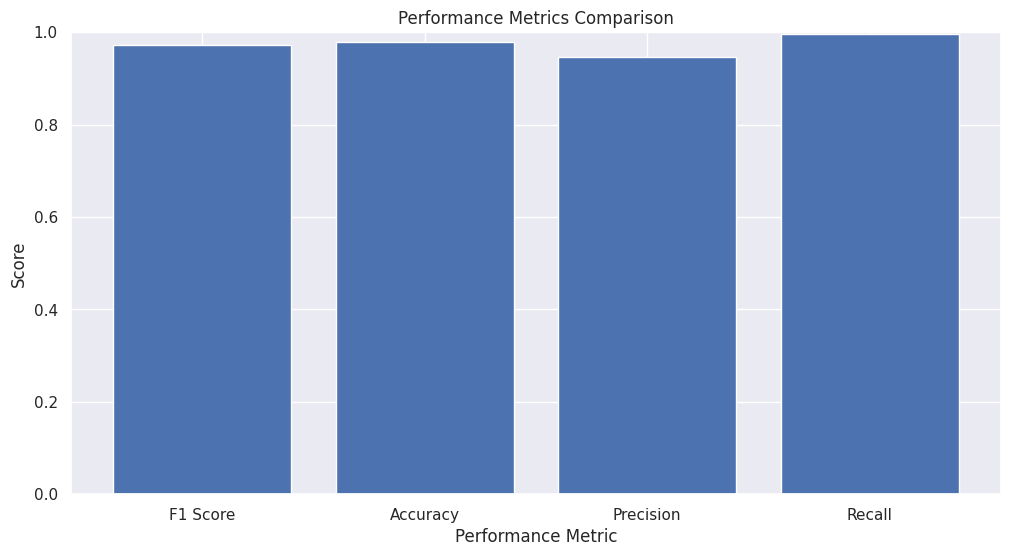

In [ ]:
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
scores = [f1_score(occupancy_test1["Occupancy"], log_predictions_occupancy), accuracy_score(occupancy_test1["Occupancy"], log_predictions_occupancy), precision_score(occupancy_test1["Occupancy"], log_predictions_occupancy), recall_score(occupancy_test1["Occupancy"], log_predictions_occupancy)]

plt.bar(labels, scores)
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Display the plot
plt.show()

### SVM

In [ ]:
model_svm_occupancy = SVC(C= 1, gamma= 0.1, kernel= 'rbf', max_iter=10000)

model_svm_occupancy.fit(df_occupancy_transformed, occupancy_train["Occupancy"])

svm_predictions_occupancy = model_svm_occupancy.predict(df_occupancy_transformed_test1)

print("\nSVM Occupancy Data Set: ")
print("F1 Score: ", f1_score(occupancy_test1["Occupancy"], svm_predictions_occupancy))
print("Accuracy: ", accuracy_score(occupancy_test1["Occupancy"], svm_predictions_occupancy))
print("Precision: ", precision_score(occupancy_test1["Occupancy"], svm_predictions_occupancy))
print("recall: ", recall_score(occupancy_test1["Occupancy"], svm_predictions_occupancy))


SVM Occupancy Data Set: 
F1 Score:  0.9603567888999008
Accuracy:  0.9699812382739212
Precision:  0.9263862332695985
recall:  0.9969135802469136


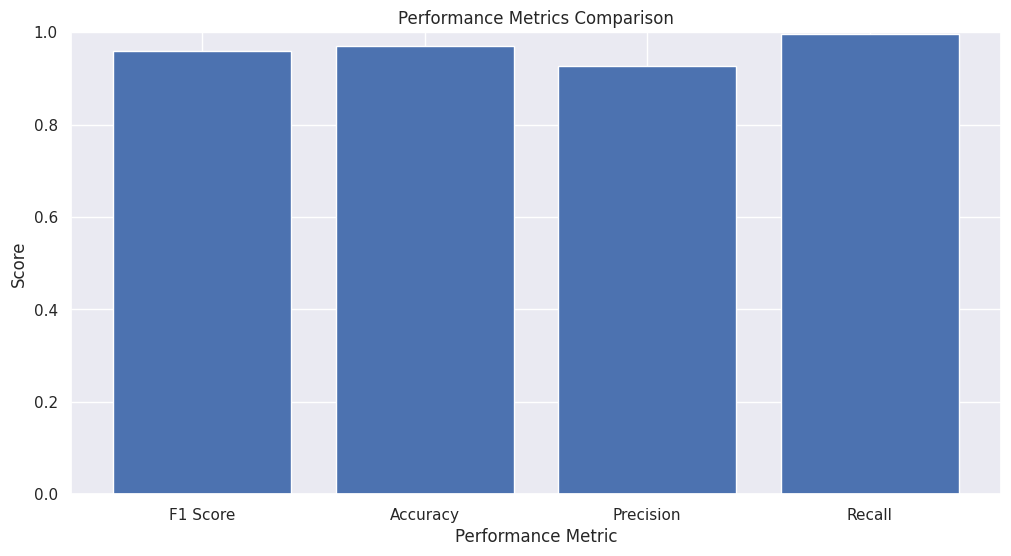

In [ ]:
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
scores = [f1_score(occupancy_test1["Occupancy"], svm_predictions_occupancy), accuracy_score(occupancy_test1["Occupancy"], svm_predictions_occupancy), precision_score(occupancy_test1["Occupancy"], svm_predictions_occupancy), recall_score(occupancy_test1["Occupancy"], svm_predictions_occupancy)]

plt.bar(labels, scores)
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Display the plot
plt.show()

### KNN

In [ ]:
knn_occupancy = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 9, weights= 'uniform')

knn_occupancy.fit(df_occupancy_transformed, occupancy_train["Occupancy"])

knn_predictions_occupancy = knn_occupancy.predict(df_occupancy_transformed_test1)

print("\nKNN Occupancy Data Set: ")
print("F1 Score: ", f1_score(occupancy_test1["Occupancy"], knn_predictions_occupancy))
print("Accuracy: ", accuracy_score(occupancy_test1["Occupancy"], knn_predictions_occupancy))
print("Precision: ", precision_score(occupancy_test1["Occupancy"], knn_predictions_occupancy))
print("recall: ", recall_score(occupancy_test1["Occupancy"], knn_predictions_occupancy))


KNN Occupancy Data Set: 
F1 Score:  0.948125321006677
Accuracy:  0.9621013133208255
Precision:  0.9466666666666667
recall:  0.9495884773662552


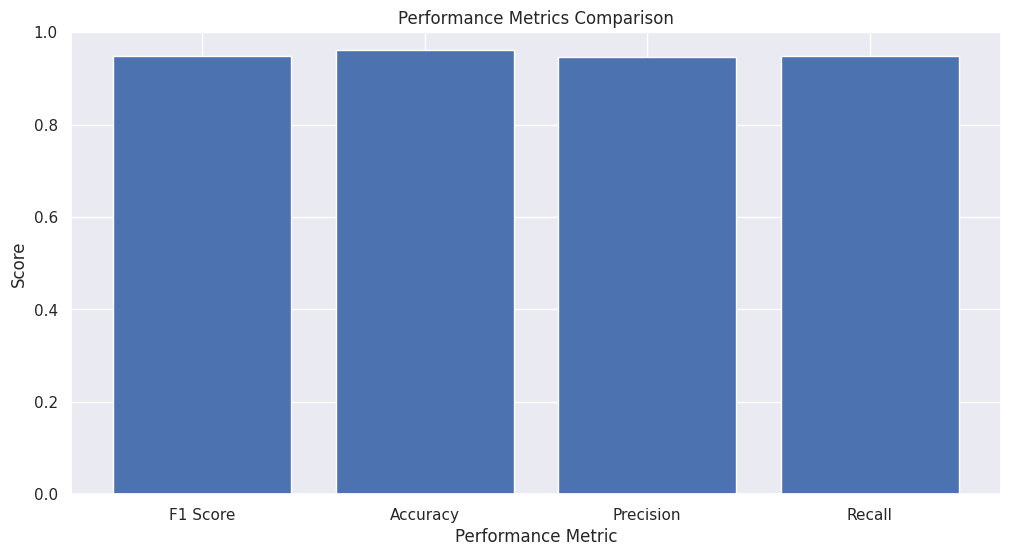

In [ ]:
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
scores = [f1_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), accuracy_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), precision_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), recall_score(occupancy_test1["Occupancy"], knn_predictions_occupancy)]

plt.bar(labels, scores)
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Display the plot
plt.show()

### Decission Tree

In [ ]:
dtc_occupancy = DecisionTreeClassifier(max_depth= 5, min_samples_split= 2)

dtc_occupancy.fit(df_occupancy_transformed, occupancy_train["Occupancy"])

dtc_predictions_occupancy = dtc_occupancy.predict(df_occupancy_transformed_test1)

print("\nDecision Tree Occupancy Data Set: ")
print("F1 Score: ", f1_score(occupancy_test1["Occupancy"], dtc_predictions_occupancy))
print("Accuracy: ", accuracy_score(occupancy_test1["Occupancy"], dtc_predictions_occupancy))
print("Precision: ", precision_score(occupancy_test1["Occupancy"], dtc_predictions_occupancy))
print("recall: ", recall_score(occupancy_test1["Occupancy"], dtc_predictions_occupancy))


Decision Tree Occupancy Data Set: 
F1 Score:  0.7626076260762606
Accuracy:  0.8551594746716698
Precision:  0.9480122324159022
recall:  0.6378600823045267


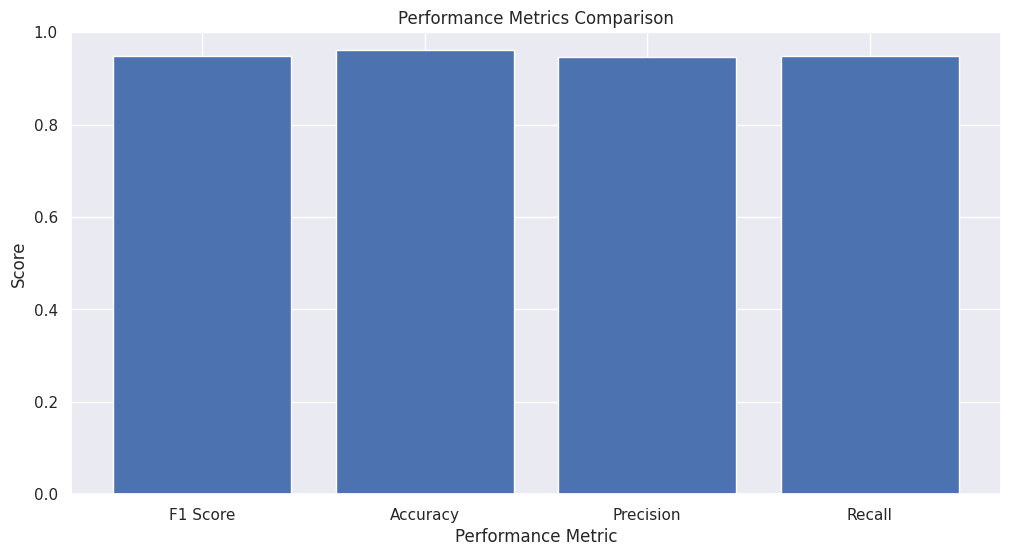

In [ ]:
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
scores = [f1_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), accuracy_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), precision_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), recall_score(occupancy_test1["Occupancy"], knn_predictions_occupancy)]

plt.bar(labels, scores)
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Display the plot
plt.show()

## Best Model Evaluation

In [ ]:
log_reg_predictions_valid_occupancy = model_logistic_reg_occupancy.predict(df_occupancy_transformed_test2)

print("Logistic Regression Occupancy Data Set: ")
print("F1 Score: ", f1_score(occupancy_test2["Occupancy"], log_reg_predictions_valid_occupancy))
print("Accuracy: ", accuracy_score(occupancy_test2["Occupancy"], log_reg_predictions_valid_occupancy))
print("Precision: ", precision_score(occupancy_test2["Occupancy"], log_reg_predictions_valid_occupancy))
print("recall: ", recall_score(occupancy_test2["Occupancy"], log_reg_predictions_valid_occupancy))

Logistic Regression Occupancy Data Set: 
F1 Score:  0.9840579710144928
Accuracy:  0.9932321575061526
Precision:  0.9741750358680057
recall:  0.9941434846266471


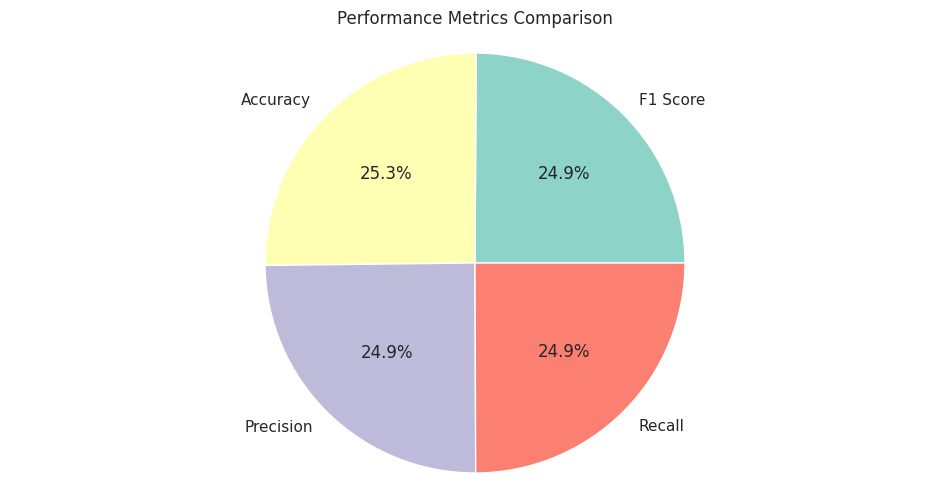

In [ ]:
labels = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
scores = [f1_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), accuracy_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), precision_score(occupancy_test1["Occupancy"], knn_predictions_occupancy), recall_score(occupancy_test1["Occupancy"], knn_predictions_occupancy)]

plt.bar(labels, scores)
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Display the plot
plt.show()

# References

1. scikit-learn. (n.d.). sklearn.metrics.f1_score. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
2. scikit-learn. (n.d.). Cross-validation: evaluating estimator performance. Retrieved from https://scikit-learn.org/stable/modules/cross_validation.html
3. Raschka, S., & Mirjalili, V. (2020). Python machine learning (3rd ed.). Packt Publishing. 